# Pattern Recognition and Machine Learning

Notes, exercises and simulations for Chapter 1.
Topics:
* 1.2. Probability Theory
* 1.5. Decision Theory
* 1.6. Information Theory

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## 1. Introduction

### 1.2. Probability theory

* **Joint probability** $p(X=x_i, Y=y_j)$: given two random variables X and Y, is the probability that X and Y take a particular value $x_i$ and $y_j$.

* **Marginal probability** $p(X=x_i)$: probability that the random variable X takes the value $x_i$ irrespective of the value of Y.

* **Conditional probability** $p(Y=y_j \mid X=x_j)$ conditional probability of $Y = y_j$ given $X=x_j$


Basic rules:

* **Sum rule**: $ p(X) = \sum_Y p(X,Y) $
* **Product rule**: $ p(X,Y) = p(Y \mid X)p(X) $, where $P(X,Y)$ is the joint probability of X and Y


#### EXAMPLE (with discrete random variables)

Let's suppose we analyze a group of 1677 people that are either from northern or southern hemispheres **Y={north, south}** to assess the risk of having a vitamin D deficiency (low vitamin D / normal vitamin D) **X={low, normal}
**.

In [4]:
study = pd.DataFrame({'low': [465, 321], 'normal': [382, 509]}, index = ['north', 'south'])
study

,low,normal
north,465,382
south,321,509


In [5]:
study.sum(axis=1)

north    847
south    830
dtype: int64

In [6]:
study.values.sum()

1677

##### Joint probability

In the case of discrete random variables, the **joint probability** is calculated as:

$$ p(X = x_i, Y = y_j) = \frac{n_{ij}}{N}$$ 

Where $n_{i,j}$ is the number of points in the intersection between the column $i$ and row $j$ and $N$ is the total number of elements. 

Example: Suppose we pick a random person from the study. What's the probability that this person is from the *north* **and** has *low* levels of vitamin D

$$ p(X=low, Y=north) = \frac{\textrm{Num. of north and low}}{\textrm{Total number of people}} $$



In [7]:
study.low.north / study.values.sum()

0.2772808586762075

##### Marginal probability

In the case of discrete random variables, the **marginal probability** is calculated by summing out the other variables (*marginalizing the other variables*), this is, we count over $X$ ignoring the other variables:

$$ p(X = x_i) = \sum_{j=1}^L p(X=x_i, Y=y_j)$$ 


Example: If we pick a random person from the study, what's the probability of this person having normal levels of vitamin D?
(we don't care about the hemisphere, we marginalize Y)

$$ p(X=low) = \frac{\textrm{Num. of people with low vit. D from north} + \textrm{Num. of low vit.D from south}}{\textrm{Total number of people}}  $$

In [8]:
study.low.sum() / study.values.sum()

0.46869409660107336

##### Conditional probability

In the case of discrete random variables, the **conditional probability** $p(Y=y_j\mid X=x_i)$ is the fraction of those points in column $i$ ($c_i$) that fall in the intersection between column $i$ and row $j$:

$$ p(Y=y_j \mid X=xi) = \frac{n_{ij}}{c_i} $$

Example: if we pick a random person from this study, what's the probability of this person being from the northern hemisphere if we know that he has low levels of vitamin D?

$$ p(Y=north \mid X=low) = \frac{\textrm{Num. of people from north with low vitamin D}}{\textrm{Total number of people with low vitamin D}}  $$

In [9]:
study.low.north / (study.low.north + study.low.south)

0.59160305343511455

#### Sum rule



#### Product rule
$P(X,Y) = P(Y \mid X)P(X)$, i.e., the joint probability of X and Y can be calculated as the probability of Y given X times the probability of X. Following the previous example:

Suppose we pick a random person from the study. What's the probability that this person is from the *north* **and** has *low* levels of vitamin D (using the product rule)?

$$ p(X=low, Y=north) = p(Y=north \mid X=low)p(X=low)$$

TODO: From discrete to continuous

### 1.2.1 Probability densities


#### Exercise 1.4 (from the book). Transformation of a probability density under a nonlinear change of variable

Let's suppose we are analyzing a random variable $x$ and we know its probability density function $p_x(x)$. Now, if we transform $x$ by means of a non-linear function $y = g(x)$, what's the probability density function of $p_y(y)$?

Let's see an example first:

* $p_x(x) = N(0, 0.25)$
* $y = exp(x) \leftrightarrow x = ln(y)$
* $p_y(y)?$

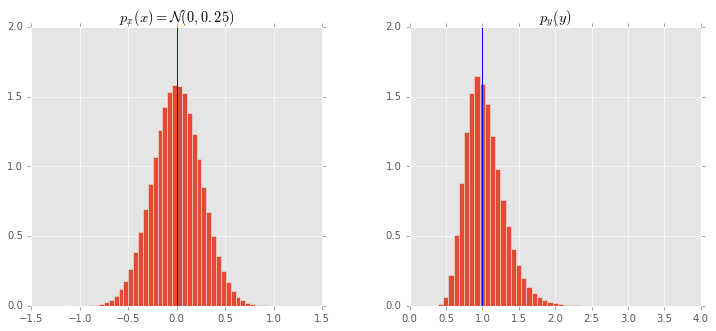

In [40]:
fig, axs = plt.subplots(1,2, figsize=(12, 5))

mu=0
sigma = 0.25
sigma2 = sigma**2

x = np.random.normal(mu, sigma, 1000000)
y = np.exp(x)

ax1 = pd.DataFrame({'$p_x(x) = \mathcal{N}(0, 0.25)$': x}).hist(bins=50, ax=axs[0], normed=True)
ax2 = pd.DataFrame({'$p_y(y)$': y}).hist(bins=50, ax=axs[1], normed=True)

x0 = 0
y0 = np.exp(x0)

ax1[0].plot((x0, x0), (0, 2), 'b-')
ax2[0].plot((y0, y0), (0, 2), 'b-')

Observations falling in the range $(x, x + \delta_x)$ are transformed to the range $(y, y + \delta_y)$ by means of the non linear function $y = g(x)$. The probability in the range $(x, x+\delta_x)$ can be approximated by $p_x(x)\delta_x$, whereas the probability of the range $(y, y+\delta_y)$ can be approximated by $p_y(y)\delta_y$ for small values of $\delta_x$ and $\delta_y$, and after the transformation we expect that $p_x(x)\delta_x \simeq p_y(y)\delta_y$.

Let's use for a moment the previous example. The point $x=0$ is transformed to $y=exp(0)=1$, and we can see $p_x(0)\delta_x \simeq p_y(1)\delta_y$.

In general, from $p_x(x)\delta_x \simeq p_y(y)\delta_y$ we can calculate $p_y(y)$ since $p_x(x)$ and $y=g(x)$ are known:

$$ p_y(y) \simeq p_x(x)\frac{\delta_x}{\delta_y} $$

Since $x = g^{-1}(y)$, we replace $\delta_x$ by $\delta g^{-1}(y)$:

$$ p_y(y) \simeq p_x(x)\frac{\delta g^{-1}(y)}{\delta_y} = p_x(g^{-1}(y))[g^{-1}(y)]' $$

For the example, $g^{-1}(y)$ is the inverse of $exp(x)$, which is $ln(y)$, and since $p(x)$ is normal:

$$ p_x(x)[g^{-1}(y)]' = p_x(x)[ln(y)]' = p_x(ln(y))\frac{1}{y} = \frac{1}{y\sqrt{2\pi\sigma^2}}e^{-(ln(y)-\mu)^2 / 2\sigma^2}$$

where, in this example, $\mu=0, \sigma^2=0.25^2$

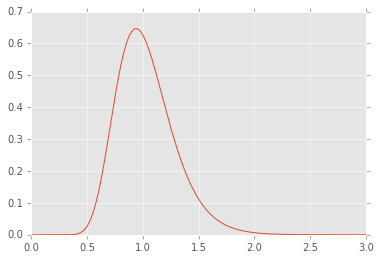

In [41]:
from math import sqrt, pi, exp, log

def p_y(y, mu=mu, sigma2=sigma2):
    return (1/y*sqrt(2*pi*sigma2))*exp(-(log(y)-mu)**2/(2*sigma2))

x = np.linspace(0.001, 3, 10000)
plt.plot(x, [p_y(i) for i in x])

### 1.2.5 Curve fitting revisited

In [38]:
0.25**2

0.0625